In [6]:
import sys
import os
import io
import time
import japanize_matplotlib
import pathlib
import yaml
import importlib

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

from yaml import Loader

In [7]:
root = '/Users/i-uch/Desktop/Shukyu-stats/Dashboard'
os.chdir(root)
sys.path.append(root)

In [8]:
import generate as g
importlib.reload(g)

<module 'generate' from '/Users/i-uch/Desktop/Shukyu-stats/Dashboard/generate.py'>

In [9]:
%%timeit -n 1 -r 1
match_dict = {match: g.MatchData(match) for match in sorted(os.listdir(os.path.join(root, 'data'))) if not match.startswith('.')}

28.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [10]:
match_dict = {match: g.MatchData(match) for match in sorted(os.listdir(os.path.join(root, 'data'))) if not match.startswith('.')}

In [11]:
match_dict

{'10sec_vsRissho': <generate.MatchData at 0x17a9e7250>,
 '11sec_vsWaseda': <generate.MatchData at 0x124c05110>,
 '12sec_vsWaseda': <generate.MatchData at 0x178cc60d0>,
 '13sec_vsHosei': <generate.MatchData at 0x161d4a050>,
 '14sec_vsSenshu': <generate.MatchData at 0x161b56810>,
 '15sec_vsToyo': <generate.MatchData at 0x151a3af50>,
 '16sec_vsRissho': <generate.MatchData at 0x168b54350>,
 '17sec_vsChuo': <generate.MatchData at 0x129985f90>,
 '18sec_vsKomazawa': <generate.MatchData at 0x129983e50>,
 '19sec_vsRKU': <generate.MatchData at 0x15b70d590>,
 '1sec_vsKomazawa': <generate.MatchData at 0x15b70d410>,
 '20sec_vsMeiji': <generate.MatchData at 0x129f47690>,
 '21sec_vsToin': <generate.MatchData at 0x13538c9d0>,
 '22sec_vsJunten': <generate.MatchData at 0x12cb81650>,
 '2sec_vsToin': <generate.MatchData at 0x1350e42d0>,
 '3sec_vsToyo': <generate.MatchData at 0x13a04cd90>,
 '4sec_vsMeiji': <generate.MatchData at 0x14f374f50>,
 '5sec_vsJunten': <generate.MatchData at 0x14ce58210>,
 '6sec_vs

In [12]:
events = [
        '失点',
        '得点',
        'GK',
        'スローイン',
        'FK',
        'CK',
        'PK',
        'パス',
        'ドリブル',
        '枠外シュート',
        'クロス',
        '枠内シュート',
        '被枠外シュート',
        'クリア',
        'ブロック',
        'インターセプト',
        'シュートブロック',
        'カット',
        '被枠内シュート',
        'ファール',
        'オフサイド',
        'キャッチ',
        'パンチング',
        'セービング'
]
    
gps_events = ['走行距離', 'HI距離','最高速度','最高速度','スプリント回数']
event_count_dict = {}
possession_rate_dict = {}
gps_average_dict = {}

In [13]:
def get_gps_stats(match_data, mode='average'):
    gps_dict = match_data.gps_data
    
    gps_events = ['Distance (m)', 'Speed (km/h)','Bodyload','Acceleration (m/s/s)']
    if mode == 'average':
        averages = {e:0 for e in gps_events}
        for player, df in gps_dict.items():
            for key in gps_events:
                try:
                    averages[key] += df[key].mean() / len(gps_dict.keys())
                except:
                    averages[key] += 0
    return averages


In [14]:
from IPython.display import display
import pandas as pd

for match, match_data in match_dict.items():
    event_df = match_data.event_data
    gps_dict = match_data.gps_data
    
    event_count_dict[match] = [match_data.get_count(e) for e in events]
    possession_rate_dict[match] = match_data.possession_time(0, 90*60)
    gps_average_dict[match] = get_gps_stats(match_data)

'得点'
'PK'
'パス'
'枠内シュート'
'PK'
'セービング'
'失点'
'PK'
'パンチング'
'失点'
'得点'
'PK'
'パス'
'オフサイド'
'失点'
'パス'
'パンチング'
'PK'
'パス'
'パンチング'
'失点'
'PK'
'パス'
'PK'
'パス'
'パンチング'
'失点'
'PK'
'パス'
'得点'
'PK'
'パス'
'枠内シュート'
'オフサイド'
'パンチング'
'PK'
'被枠外シュート'
'被枠内シュート'
'キャッチ'
'パンチング'


KeyError: 0

In [ ]:
from natsort import natsorted

event_count_df = pd.DataFrame(event_count_dict, index=events, columns=natsorted(list(event_count_dict.keys())))
possession_rate_df = pd.DataFrame(possession_rate_dict, index=['筑波','相手チーム'], columns=natsorted(list(possession_rate_dict.keys())))
gps_df = pd.DataFrame(gps_average_dict, columns=natsorted(list(gps_average_dict.keys())))

for df in [event_count_df, possession_rate_df, gps_df]:
    display(df.head())

In [ ]:
import openpyxl
df = pd.concat([event_count_df, possession_rate_df, gps_df])
print(df.index)

df.to_excel('関東リーグスタッツ.xlsx', sheet_name='関東リーグスタッツ')

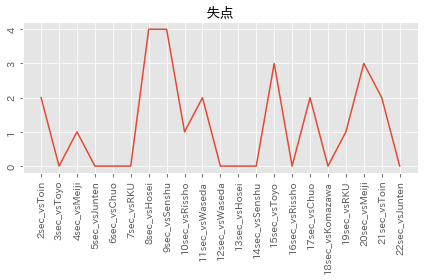

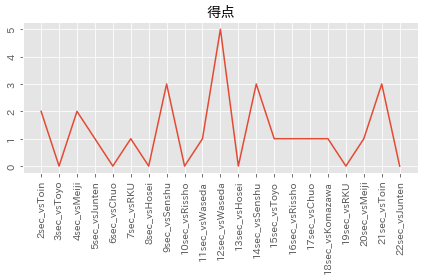

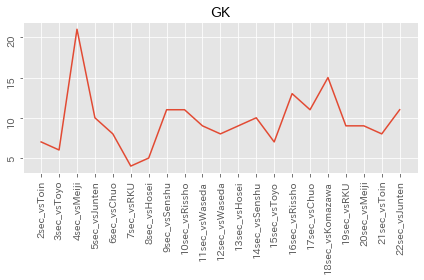

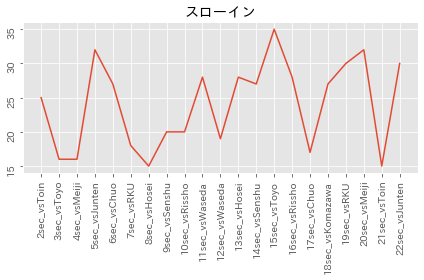

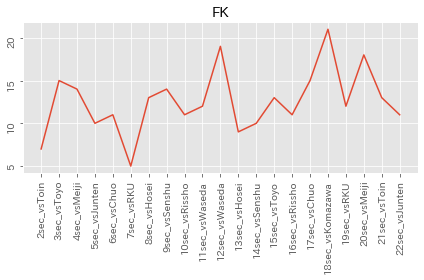

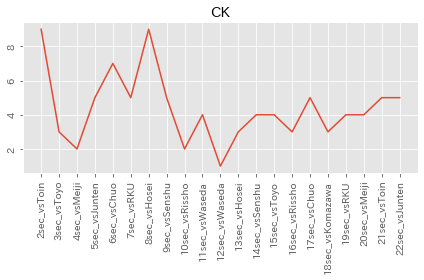

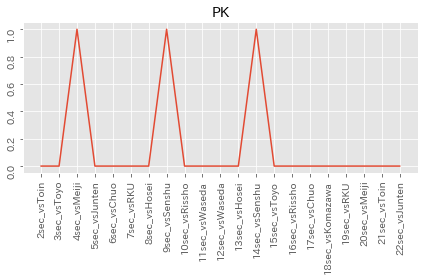

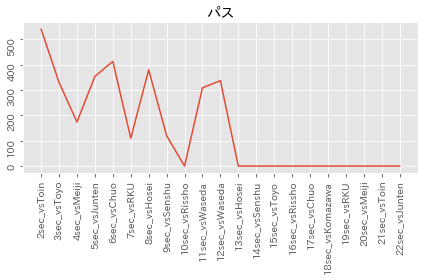

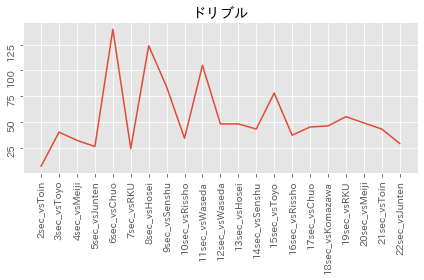

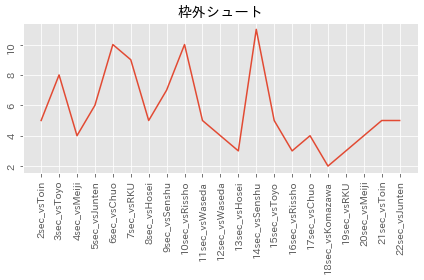

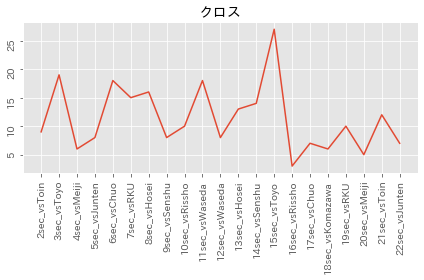

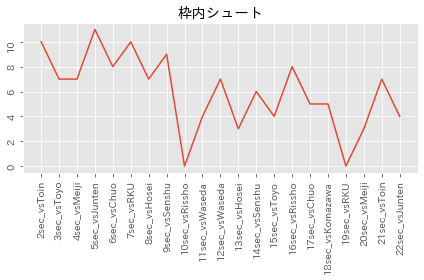

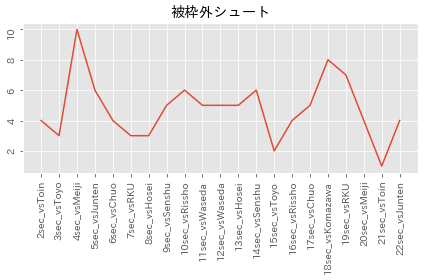

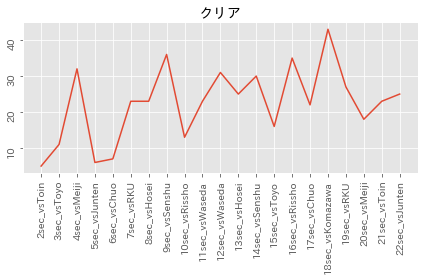

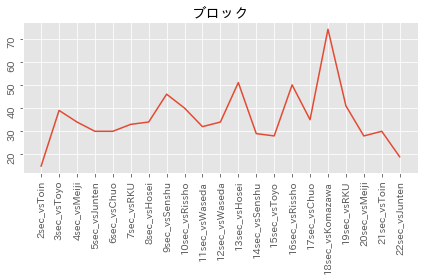

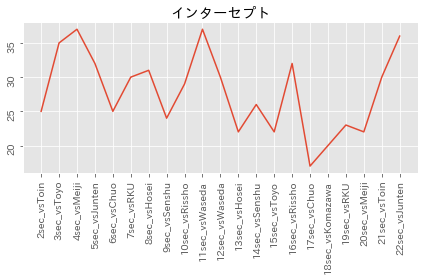

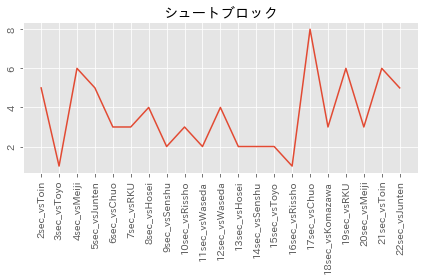

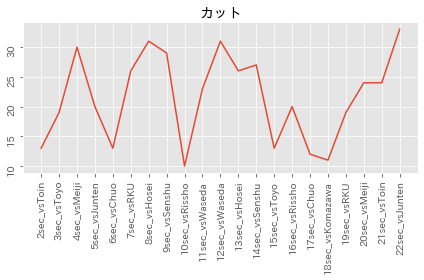

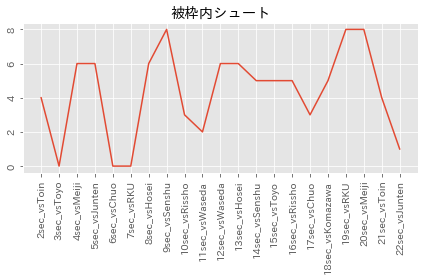

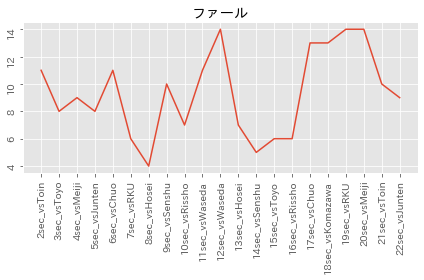

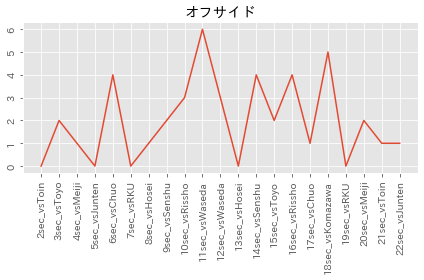

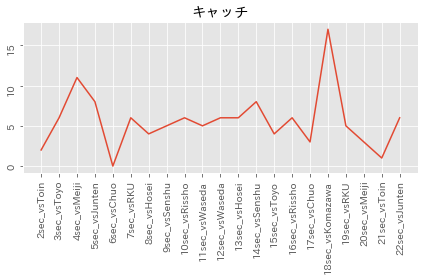

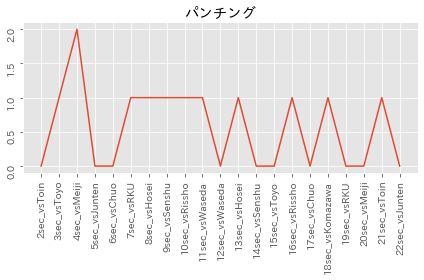

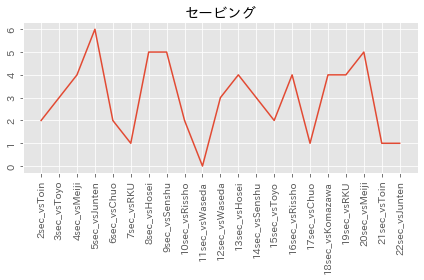

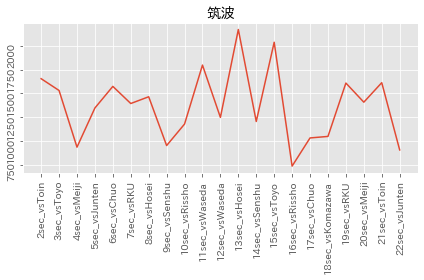

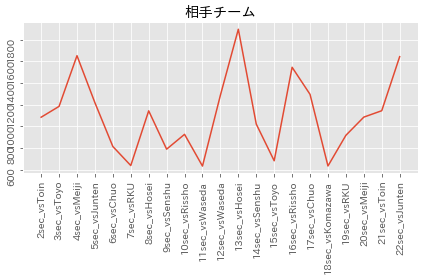

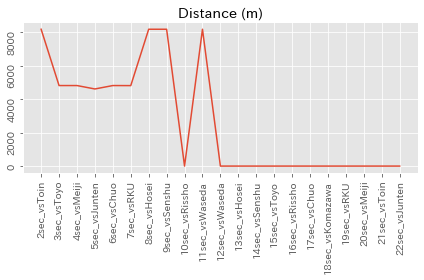

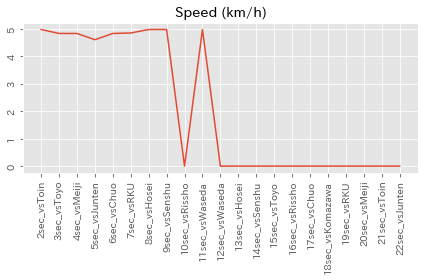

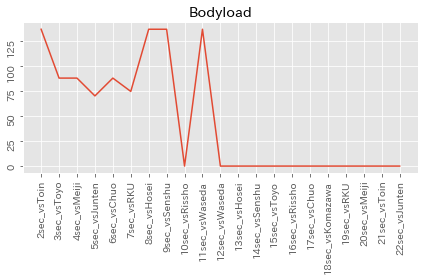

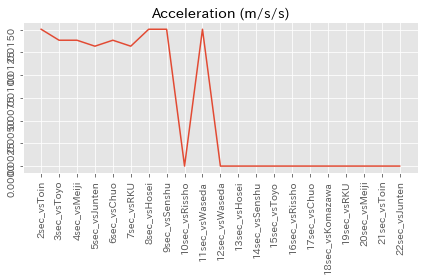

In [27]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import re
plt.style.use('ggplot')

for name, series in df.iterrows():
    plt.plot(series)
    plt.tick_params(rotation=90)
    plt.title(name)
    plt.tight_layout()
    plt.savefig(os.path.join(root, 'dev_code', 'season_report', 'figs',re.sub('[^A-Za-z0-9\u3040-\u309f\u30a0-\u30ff\uff66-\uff9f\u4e00-\u9faf]+', '', name)
+'.png'))
    plt.show()

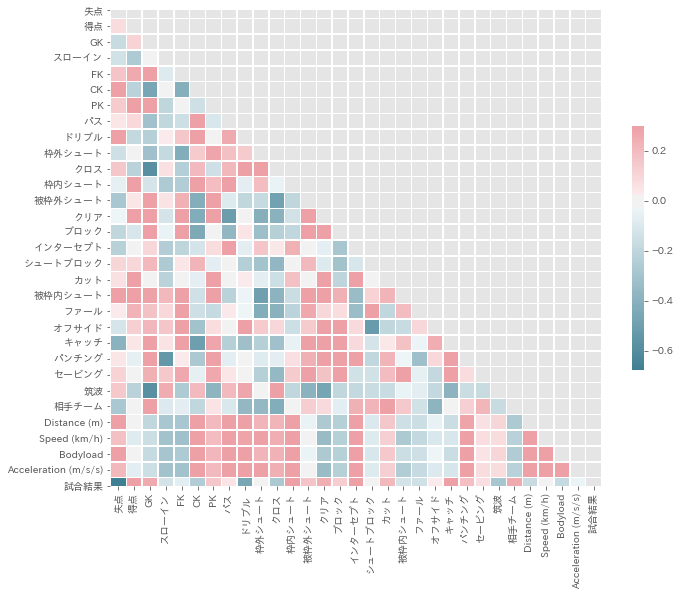

In [28]:
def match_outcome(row):
    if row['得点']>row['失点']:
        return  1
    elif row['得点']<row['失点']:
        return -1
    else:
        return 0
    
pair_plot_df = df.T.reset_index()
pair_plot_df['試合結果'] = pair_plot_df.apply(lambda row: match_outcome(row), axis=1)

corr = pair_plot_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

LinAlgError: singular matrix

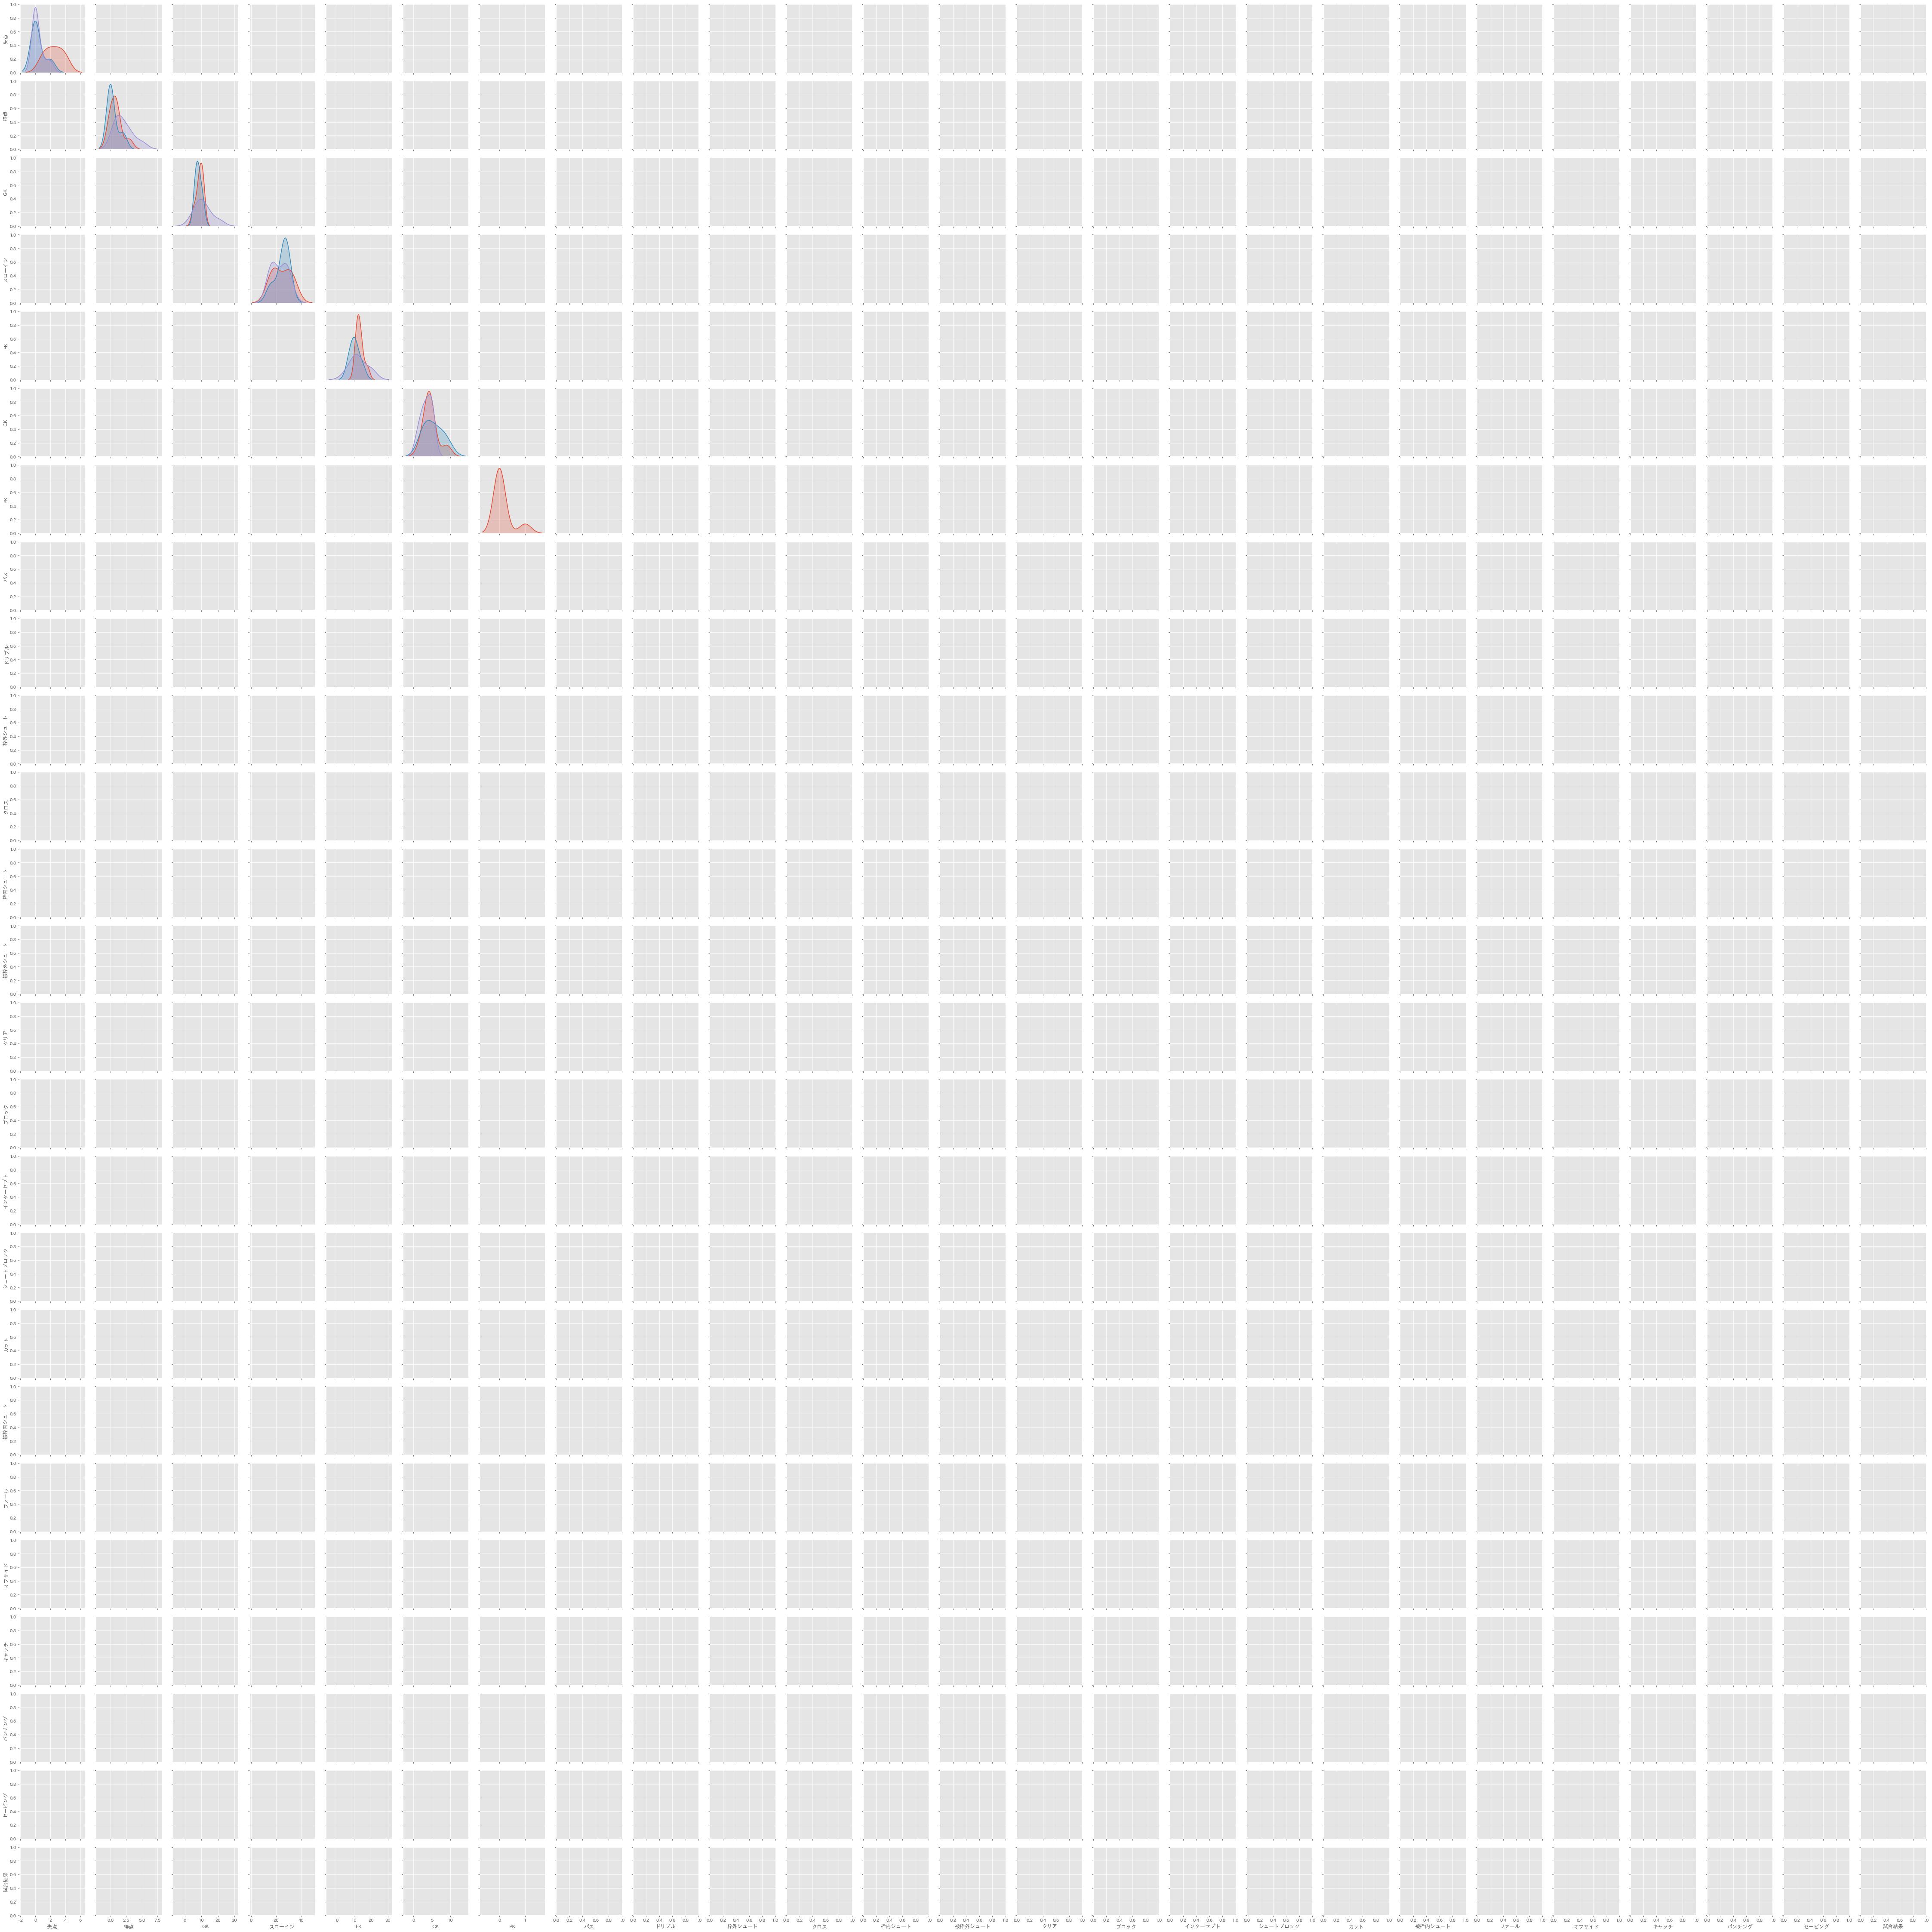

In [30]:
sns.pairplot(pair_plot_df[events[:]+['試合結果']], 
                 hue='試合結果',diag_kind="kde", markers=".",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True))